# Analysis of Antibiotics Usage in Human Microbiota
## Students: Emelyn, Matheus, Mayllon and Natalia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

The data below, represents the absolute abudancy of each species in an experiment, where each individual was passed through antibiotic usage. The bacteria species abudancy were measured before and after the usage of these drugs. The goal here is to make analysis of the data, using ecology and statistics methods.

In [2]:
data = {
    'Species': [
        'Lactobacillus', 'Clostridium', 'Bacteroides', 'Prevotella', 'Escherichia coli',
        'Bifidobacterium', 'Faecalibacterium', 'Ruminococcus', 'Akkermansia',
        'Enterococcus', 'Fusobacterium', 'Megasphaera', 'Streptococcus', 
        'Veillonella', 'Dialister'
    ],
    
    'Individual 1 (Before)': [15, 10, 20, 8, 5, 12, 6, 9, 4, 3, 7, 2, 3, 6, 1],
    'Individual 2 (Before)': [20, 12, 18, 10, 3, 14, 5, 8, 3, 2, 6, 1, 4, 5, 2],
    'Individual 3 (Before)': [18, 15, 22, 9, 4, 11, 4, 10, 5, 4, 8, 2, 5, 4, 3],
    'Individual 4 (Before)': [25, 14, 25, 7, 6, 10, 7, 11, 6, 3, 7, 2, 2, 3, 1],
    'Individual 1 (After)': [5, 3, 6, 1, 20, 2, 2, 1, 1, 5, 3, 1, 2, 3, 0],
    'Individual 2 (After)': [7, 4, 5, 1, 25, 1, 1, 2, 1, 6, 2, 0, 1, 2, 1],
    'Individual 3 (After)': [6, 5, 7, 2, 22, 3, 2, 2, 1, 4, 4, 1, 2, 4, 0],
    'Individual 4 (After)': [8, 2, 4, 1, 23, 2, 1, 1, 1, 5, 3, 0, 1, 2, 0]
}

df = pd.DataFrame(data)

df

,Species,Individual 1 (Before),Individual 2 (Before),Individual 3 (Before),Individual 4 (Before),Individual 1 (After),Individual 2 (After),Individual 3 (After),Individual 4 (After)
0,Lactobacillus,15,20,18,25,5,7,6,8
1,Clostridium,10,12,15,14,3,4,5,2
2,Bacteroides,20,18,22,25,6,5,7,4
3,Prevotella,8,10,9,7,1,1,2,1
4,Escherichia coli,5,3,4,6,20,25,22,23
5,Bifidobacterium,12,14,11,10,2,1,3,2
6,Faecalibacterium,6,5,4,7,2,1,2,1
7,Ruminococcus,9,8,10,11,1,2,2,1
8,Akkermansia,4,3,5,6,1,1,1,1
9,Enterococcus,3,2,4,3,5,6,4,5


In [3]:
df = df.reindex(
    ['Individual 1 (Before)', 
     'Individual 2 (Before)',
     'Individual 3 (Before)',
     'Individual 4 (Before)', 
     'Individual 1 (After)', 
     'Individual 2 (After)',
     'Individual 3 (After)',
     'Individual 4 (After)'], axis=1)

df_before = df.reindex(
    ['Individual 1 (Before)', 
     'Individual 2 (Before)',
     'Individual 3 (Before)',
     'Individual 4 (Before)'], axis=1)

df_after = df.reindex(
    ['Individual 1 (After)', 
     'Individual 2 (After)',
     'Individual 3 (After)',
     'Individual 4 (After)'], axis=1)

data = df.values
data_before = df_before.values
data_after = df_after.values

First, we can simply calculate the Euclidean distance between each individual before and after the usage of antibiotics, which gives us the individual that changed the most, according to this distance.

In [4]:
euclidean_dist = np.sqrt(np.sum((data_before - data_after)**2, axis=0))

euclidean_dist

array([28.98275349, 35.27038418, 32.01562119, 38.09199391])

We can see individual 4 changed the most after this analysis. We can also check which individual lost the most species richness, that is, who lost the most amount of bacteria species after antibiotics.

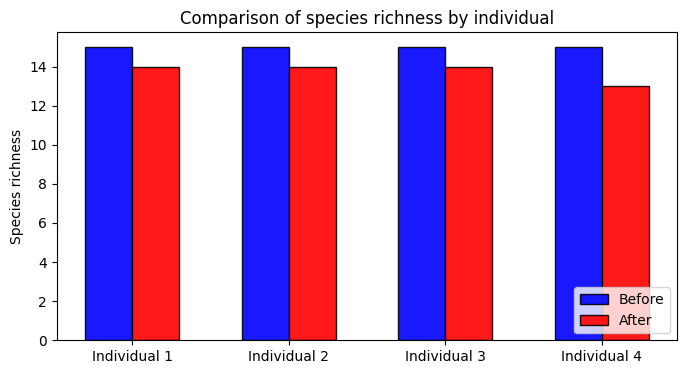

In [5]:
richness_before = np.sum(data_before != 0, axis=0)
richness_after = np.sum(data_after != 0, axis=0)

labels = ['Individual 1', 'Individual 2', 'Individual 3', 'Individual 4']

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x - width/2, richness_before, width, label='Before', color='b', alpha=0.9, edgecolor='k')
rects2 = ax.bar(x + width/2, richness_after, width, label='After', color='r', alpha=0.9, edgecolor='k')

ax.set_ylabel('Species richness')
ax.set_title('Comparison of species richness by individual')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
plt.show()

Here, we can see that individual 4 lost the most richness in its bacteria species.

We can also plot the data using PCA dimensionality reduction, to see tha individuals as points in the 2D plane.

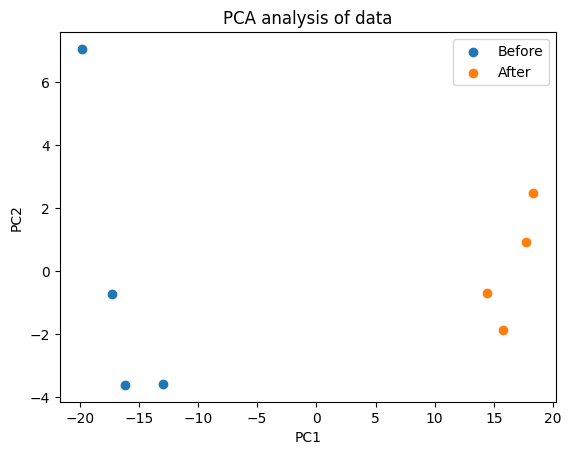

In [6]:
pca = PCA(n_components=2)
pca.fit(data.T)
pca_plot = pca.transform(data.T)

plt.scatter(pca_plot[0:4].T[0], pca_plot[0:4].T[1], label='Before')
plt.scatter(pca_plot[4:].T[0], pca_plot[4:].T[1], label='After')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA analysis of data')
plt.legend()
plt.show()

The next analysis we present is the Bray-Curtis dissimilarity. This is a dissimilarity measure used in ecology to quantify how different two sites are. We present the comparison between all 8 individual data, before and after the antibiotics usage.

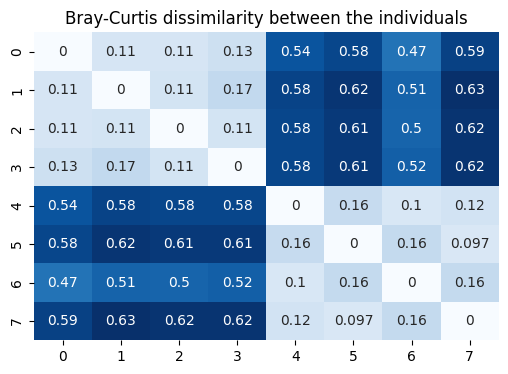

In [7]:
def braycurtis(x1, x2):
    min_sum = np.sum(np.minimum(x1, x2))
    return 1 - 2 * min_sum / (np.sum(x1) + np.sum(x2))

braycurtis_matrix = np.array([[braycurtis(data.T[i], data.T[j]) for i in range(8)] for j in range(8)])

plt.figure(figsize=(6, 4))
sns.heatmap(braycurtis_matrix, annot=True, cmap='Blues', cbar=False)
plt.title('Bray-Curtis dissimilarity between the individuals')
plt.show()

Here, we conclude that the individuals before the usage of antibiotics are similar to each other, and the same goes to after its application. But the cross data, i.e., the dissimilarity between individuals before and after the antibiotics is really high. We can visualize the effect of antibiotics in the following box plot:

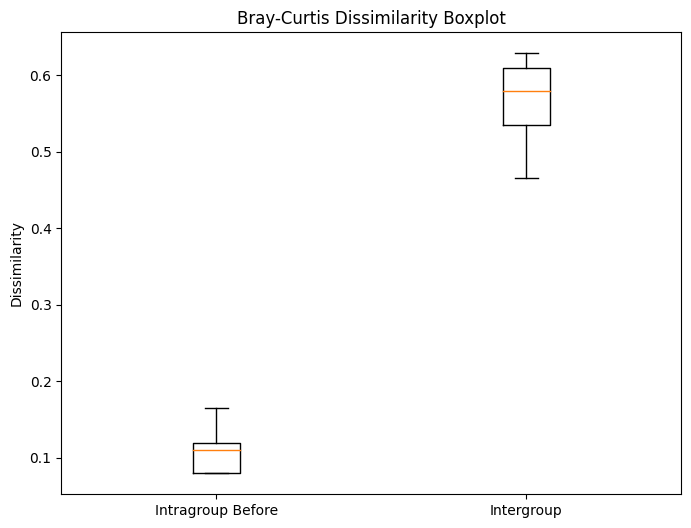

In [8]:
intragroup_before = braycurtis_matrix[0:4, 0:4].ravel()   
intergroup = braycurtis_matrix[4:, 0:4].ravel()

data_boxplot = [intragroup_before, intergroup]
labels = ['Intragroup Before', 'Intergroup']

plt.figure(figsize=(8, 6))
plt.boxplot(data_boxplot, labels=labels, showfliers=False)
plt.title("Bray-Curtis Dissimilarity Boxplot")
plt.ylabel("Dissimilarity")
plt.show()

Here, we see that the Bray-Curtis distance is clearly increasing after the usage of antibiotics.

Another analysis we can make is about the diversity of species in the individuals before and after the medication ingestion. For that, we use the Shannon index.

In [9]:
def shannon(x):
    N = np.sum(x)
    p = x / N
    p = p[p != 0]
    return - np.sum(p * np.log(p))

Plotting the results:

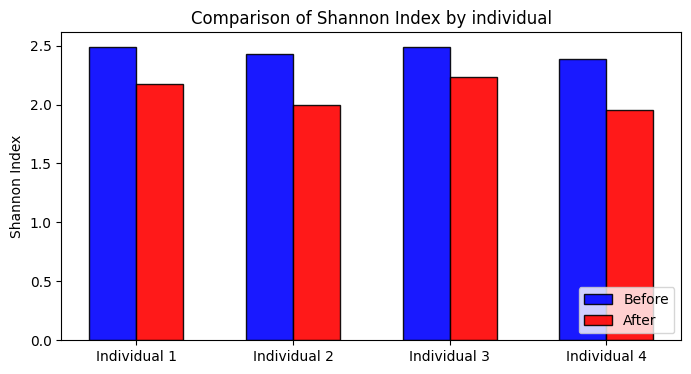

In [10]:
shannon_list = [shannon(data.T[i]) for i in range(8)]

labels = ['Individual 1', 'Individual 2', 'Individual 3', 'Individual 4']

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x - width/2, shannon_list[0:4], width, label='Before', color='b', alpha=0.9, edgecolor='k')
rects2 = ax.bar(x + width/2, shannon_list[4:], width, label='After', color='r', alpha=0.9, edgecolor='k')

ax.set_ylabel('Shannon Index')
ax.set_title('Comparison of Shannon Index by individual')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
plt.show()

We can see that every individual lost diversity after the ingestion of antibiotics, as expected. Plotting a box plot for different visualization:

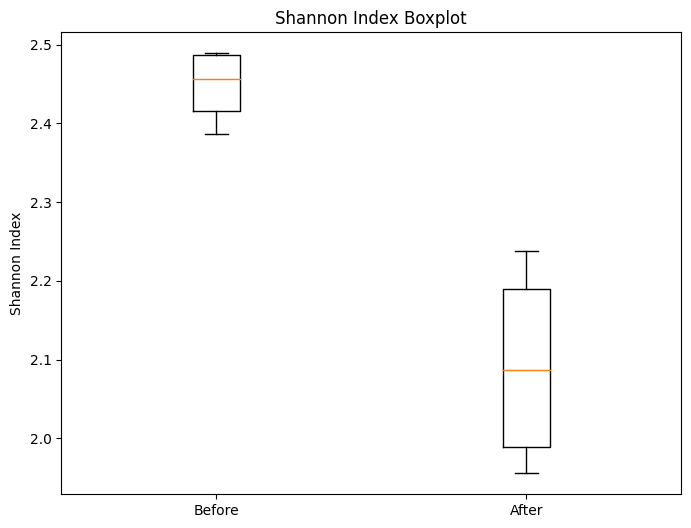

In [11]:
data_boxplot = [shannon_list[0:4], shannon_list[4:]]
labels = ['Before', 'After']

plt.figure(figsize=(8, 6))
plt.boxplot(data_boxplot, labels=labels, showfliers=False)
plt.title("Shannon Index Boxplot")
plt.ylabel("Shannon Index")
plt.show()

Here, we see that the individuals lost biodiversity after using antibiotics, but became a more heterogeneous population of microbiota, as we see comparing both box sizes. For the final analysis, we can make a hypothesis test, more specifically, Welch's t-test, to comprove that the mean values of diversity in the individuals is different after insuming antibiotics.

In [12]:
_, pvalue = stats.ttest_ind(data_boxplot[0], data_boxplot[1], equal_var=False)

significance = 0.05 
if pvalue < significance:
    print("Reject H0: the means are significantly different.")
else:
    print("Fail to reject H0: the means are not significantly different.")

Reject H0: the means are significantly different.


As expected, we indeed conclude that the usage of antibiotics makes the diversity of microbiota to decrease.